# Part II - Citi Bike Data Exploration 
## by Abdalhameed Saad



## Investigation Overview

> The overall goals for the presentation is to show the following 
- highlight the age range that has the most trips
- frequencies of rider gender and user type and the trip duration
- trip frequencies by weekday and usertype.
-  user type distributions based on user gender and trip duration, as well as user type distributions based on user weekday and trip duration
- month that has the most trips
- the effect of weekday on the number of trips


## Dataset Overview

> Citi Bike is New York City’s bike share system, and the largest in the nation. Citi Bike launched in May 2013 and has become an essential part of transportation network. They make commute fun, efficient and affordable – not to mention healthy and good for the environment.

> Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? Discovering the answers to these questions and more.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('citibike_Jan_to_Apr2020_clean.csv')

### Which age range has the most trips?
>users between the age of 30 to 35 has more trips than other age in the disruption,I only need to adjust the bin in the subplot.

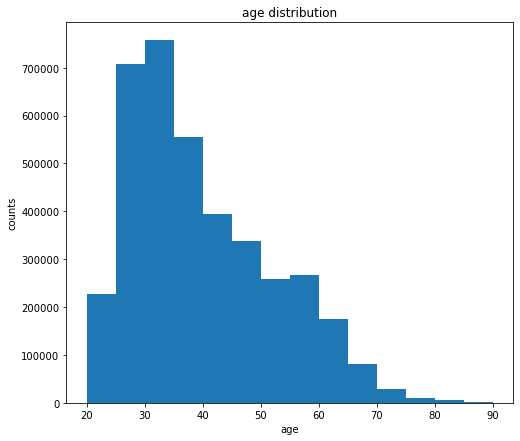

In [24]:
plt.figure(figsize=(8,7))
bins = np.arange(20, df_clean['age'].max()+5, 5)
plt.hist(df_clean.query("age != 51")['age'] , bins = bins);
plt.xlabel('age')
plt.ylabel('counts')
plt.title('age distribution');


### does user type and gender have correlation with the duration time take for each trip?
> It is evident that female customers had longer trips compared to male customers in the last plot, which shows there are clear differences between them.


> customers tend to have more trip duration than subscriber

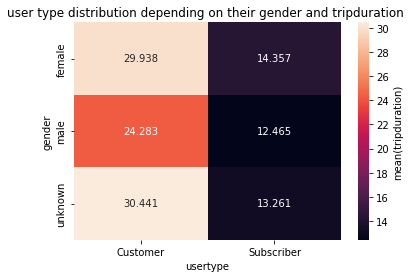

In [25]:
cat_means = df_clean.groupby(['usertype', 'gender']).mean()['tripduration']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'gender', columns = 'usertype',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(tripduration)'})
plt.title('user type distribution depending on their gender and tripduration ');

### does trip frequencies by weekday and usertype effect the trip duration?

> The average trip duration for subscribers is shorter by half than the average trip duration for users during normal weekdays. On holidays, the average trip duration for subscribers is double than the average trip duration for users..

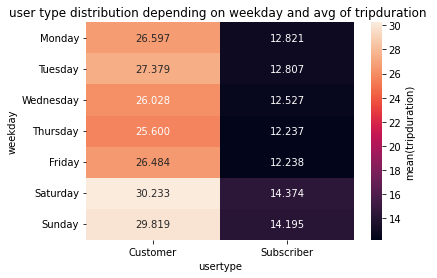

In [26]:
df_clean['weekday'] = pd.Categorical(df_clean['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
cat_means = df_clean.groupby(['usertype', 'weekday']).mean()['tripduration']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'weekday', columns = 'usertype',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(tripduration)'})
plt.title('user type distribution depending on weekday and avg of tripduration ');

### Which month has the most trips?

> month of January has the most trips

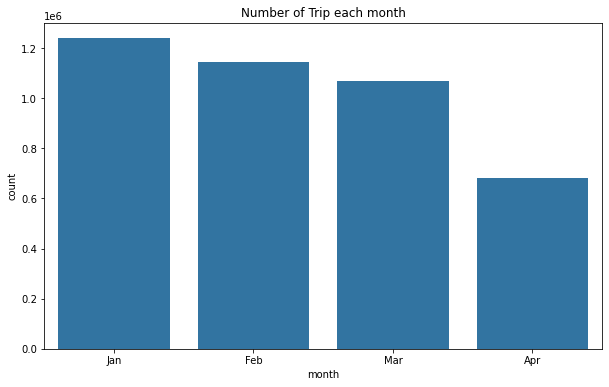

In [27]:
base_color = sb.color_palette()[0]
month_order = df_clean['month'].value_counts().index
plt.figure(figsize=[10,6])
sb.countplot(data = df_clean,x='month',order = month_order ,color =base_color)
plt.title('Number of Trip each month');

## does weekday effect the number of trips ?
> there is an increase in the number of trips for customers on holidays, which are Sunday and Monday, but on the other hand; the number of subscriber trips are decreasing on holiday

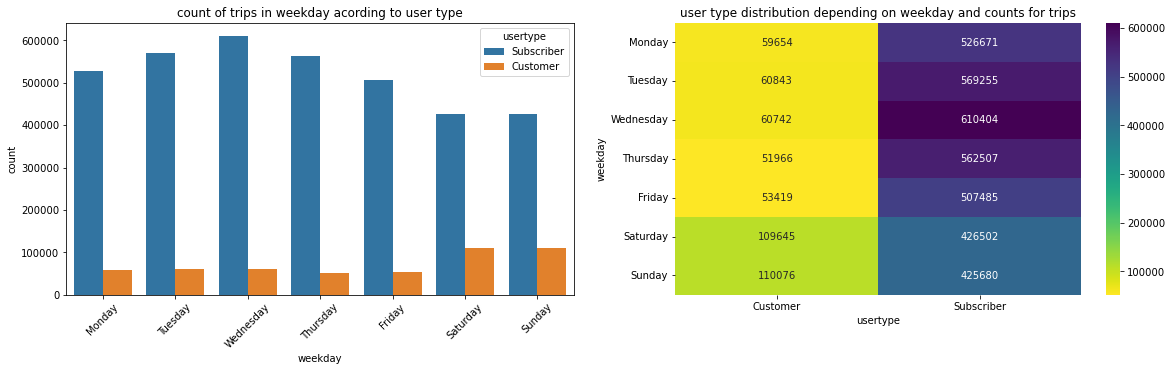

In [28]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
sb.countplot(data = df_clean, x = 'weekday', hue = 'usertype');
plt.xticks(rotation=45);
plt.title('count of trips in weekday acording to user type');
# histogram on right
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# Use group_by() and size() 
ct_counts = df_clean.groupby(['weekday', 'usertype']).size()
ct_counts = ct_counts.reset_index(name='count')
# Use DataFrame.pivot() to rearrange the data, to have weekday on rows
ct_counts = ct_counts.pivot(index = 'weekday', columns = 'usertype', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd' ,cmap='viridis_r');
plt.title('user type distribution depending on weekday and counts for trips');

In [31]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 719858 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Moayad NsrEldeen\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Moayad NsrEldeen\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Moayad NsrEldeen\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Moayad NsrEldeen\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Moayad NsrEldeen\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in conve